<a href="https://colab.research.google.com/github/anastasiarenata1/deeplearning/blob/main/LNN_with_Numpy_and_Softmax_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 4 - Regression

Classification data from 2011 Million Song Challenge dataset to predict music year

* Explore three shallow (linear) neural network models with different activation functions for this task.
* Evaluate the model by rounding the output of your linear neural network and compute the mean squared error


###1. Load and explore the data

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
!unzip YearPredictionMSD.txt.zip

--2023-03-04 20:58:05--  https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211011981 (201M) [application/x-httpd-php]
Saving to: ‘YearPredictionMSD.txt.zip’

YearPredictionMSD.t 100%[===================>] 201.24M  19.2MB/s    in 12s     

2023-03-04 20:58:17 (17.0 MB/s) - ‘YearPredictionMSD.txt.zip’ saved [211011981/211011981]

Archive:  YearPredictionMSD.txt.zip
  inflating: YearPredictionMSD.txt   


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
colnames = ['target'] + ['timbre_avg_' + str(i) for i in range(1, 13)] + ['timbre_covar_' + str(i) for i in range(1, 79)]
df = pd.read_csv('YearPredictionMSD.txt', header=None, names=colnames)
df.head(5)

,target,timbre_avg_1,timbre_avg_2,timbre_avg_3,timbre_avg_4,timbre_avg_5,timbre_avg_6,timbre_avg_7,timbre_avg_8,timbre_avg_9,...,timbre_covar_69,timbre_covar_70,timbre_covar_71,timbre_covar_72,timbre_covar_73,timbre_covar_74,timbre_covar_75,timbre_covar_76,timbre_covar_77,timbre_covar_78
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


Write a function to load the dataset, e.g.,
`trainYears, trainFeat, testYears, testFeat = loadMusicData(fname, addBias)`

In [ ]:
def loadMusicData(data, addBias=True):
  train_df = data[:463714]
  test_df = data[463714:]
  train_y = train_df['target'].values
  train_x = train_df.iloc[:,1:].values
  test_y = test_df['target'].values
  test_x = test_df.iloc[:,1:].values
  if addBias:
    train_x = np.hstack((train_x, np.ones((train_x.shape[0],1))))
    test_x = np.hstack((test_x, np.ones((test_x.shape[0],1))))
  return train_y, train_x, test_y, test_x

Write a function `mse = musicMSE(pred, gt)` where the inputs are the predicted year and the “ground truth” year from the dataset. The function computes the mean squared error(MSE) by rounding pred before computing the MSE.

In [ ]:
from sklearn.metrics import mean_squared_error
def musicMSE(pred, gt):
  pred = np.round(pred)
  mse= mean_squared_error(pred, gt)
  return mse

Load the dataset and discuss its properties. 
1. What is the range of the variables? From 90 attributes, range of variables for timbre average is tighter than range of variables for timbre covariance. However, within each category itself, some attributes have wider range compared to others, in which we don't have further documentation to explain this event.
2. How might you normalize them? Normalization can help to ensure that each variables contribute equally to the model. Since range of variables varies significantly accross 90 attributes, I will normalize the data using standardization technique (0 mean and unit std deviation for each attribute) where we can help to preserve importance of variables.
3. What years are represented in the dataset? The dataset covers song released from 1922 to 2011 (90 years) with most common year of 2007.
4. What will the test mean squared error (MSE) be if your classifier always outputs the most common year in the dataset? 190.08

In [ ]:
# Range of variables
var_ranges = np.ptp(df.iloc[:, 1:].values, axis=0)
for i, var_range in enumerate(var_ranges):
    print("Variable {}: range = {:.0f}".format(i+1, var_range))

Variable 1: range = 60
Variable 2: range = 721
Variable 3: range = 624
Variable 4: range = 490
Variable 5: range = 444
Variable 6: range = 248
Variable 7: range = 361
Variable 8: range = 199
Variable 9: range = 273
Variable 10: range = 102
Variable 11: range = 158
Variable 12: range = 182
Variable 13: range = 550
Variable 14: range = 65727
Variable 15: range = 36796
Variable 16: range = 31832
Variable 17: range = 19854
Variable 18: range = 16826
Variable 19: range = 11882
Variable 20: range = 9564
Variable 21: range = 9610
Variable 22: range = 3707
Variable 23: range = 6731
Variable 24: range = 9808
Variable 25: range = 4871
Variable 26: range = 37870
Variable 27: range = 26522
Variable 28: range = 7735
Variable 29: range = 6635
Variable 30: range = 6669
Variable 31: range = 6153
Variable 32: range = 3471
Variable 33: range = 4567
Variable 34: range = 3921
Variable 35: range = 2803
Variable 36: range = 4208
Variable 37: range = 22597
Variable 38: range = 18155
Variable 39: range = 1586

In [ ]:
#Normalize data using standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def loadMusicData2(data, addBias=True):
  train_df = data[:463714]
  test_df = data[463714:]
  train_y = train_df['target'].values
  train_x = train_df.iloc[:,1:].values
  test_y = test_df['target'].values
  test_x = test_df.iloc[:,1:].values
  train_x= scaler.fit_transform(train_x)
  test_x= scaler.fit_transform(test_x)

  if addBias:
    train_x = np.hstack((train_x, np.ones((train_x.shape[0],1))))
    test_x = np.hstack((test_x, np.ones((test_x.shape[0],1))))
  

  return train_y, train_x, test_y, test_x

In [ ]:
#Years represented
print('Min years presented: ', np.min(df['target']))
print('Max years presented: ', np.max(df['target']))
print('Median years presented: ', np.median(df['target']))

from statistics import mode
print('Most common year:', mode(df['target']))

Min years presented:  1922
Max years presented:  2011
Median years presented:  2002.0
Most common year: 2007


In [ ]:
train_y, train_x, test_y, test_x = loadMusicData2(df, addBias=True)

In [ ]:
#test MSE
musicMSE(np.full((test_y.shape[0],), 2007), test_y)

190.08239236117836

##2. Classification
This problem could have been posed as a classification problem by treating each year as a category. What would be the problems with this approach? Support your argument by analyzing a bar chart with the year as the x-axis and the number of examples for that year as the y-axis.

As we can see from the chart, the distribution of train dataset is skewed to the left where majority of the data coming from the later years. If we treat this problem as a classification problem, the model will be biased and will be more likely to predict later years. Furthermore, classification means that the predicted data will be categorical values instead of continuous which can result in loss of information as repercussion. 

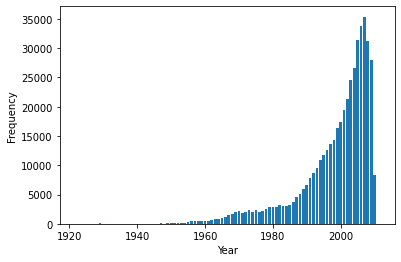

In [ ]:
#plot year frequency from train dataset
import matplotlib.pyplot as plt
train_df = df[:463714]
year_counts = train_df.iloc[:, 0].value_counts()
plt.bar(year_counts.index, year_counts.values)
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

##3. Ridge regression

* Implement stochastic gradient descent with mini-batches to minimize the loss and evaluate the train and test MSE.
* Tune the learning rate and weight decay factor. 
* Show the train and test loss as a function of epochs, where the number of epochs should be chosen to ensure the train loss is minimized.

In [ ]:
def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, batch_size=32,
                                num_epochs=100, learning_rate=0.01, 
                                weight_decay_factor=0, loss_type='L2', 
                                weight_decay_form='none', momentum=False, 
                                momentum_factor=0.9):
    num_features = X_train.shape[1]
    num_batches = int(np.ceil(len(X_train) / batch_size))
    weight = np.random.normal(size=num_features)
    m = np.zeros_like(weight)
    train_losses = []
    test_losses = []

    def forward(X, w):
        return np.dot(X, w)

    def backward(X, error):
        return np.dot(X.T, error)

    def compute_gradient(X, y, y_pred, loss_type, w):
          error = None
          if loss_type == "L2":
              error = 2*(y_pred - y)
          elif loss_type == "count":
              error = np.round(y_pred) - np.round(y) #approximation
          elif loss_type == "cross-entropy":
              error = y_pred - y
          elif loss_type == 'L1':
              error = np.sign(y_pred - y)

          gradient = backward(X, error)

          if weight_decay_form == 'L2':
              gradient += weight_decay_factor * w
          elif weight_decay_form == 'L1':
              gradient += weight_decay_factor * np.sign(w)
          return gradient, error

    def compute_loss(y, y_pred, loss_type):
        if loss_type == "L2":
            return np.mean(np.square(y - y_pred))
        elif loss_type == "count":
            return np.mean(np.abs(np.round(y) - np.round(y_pred)))
        elif loss_type == "cross-entropy":
            y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)  # clip predictions
            return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        elif loss_type == 'L1':
            return np.mean(np.abs(y - y_pred))

    for epoch in range(num_epochs):
        # Shuffle the data
        perm = np.random.permutation(len(X_train))
        X_train = X_train[perm]
        y_train = y_train[perm]

        # Mini-batch gradient descent
        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = (i + 1) * batch_size
            X_batch = X_train[start_idx:end_idx]
            y_batch = y_train[start_idx:end_idx]

            y_pred = forward(X_batch, weight)
            gradient, error = compute_gradient(X_batch, y_batch, y_pred, 
                                               loss_type, weight)

            if momentum:
              m = momentum_factor * m + (1 - momentum_factor) * gradient
              weight -= learning_rate * m
            else:
                weight -= learning_rate * gradient.reshape(weight.shape)

        # Compute train and test losses
        y_train_pred = forward(X_train, weight)
        train_loss = compute_loss(y_train, y_train_pred, loss_type)
        train_losses.append(train_loss)

        y_test_pred = forward(X_test, weight)
        test_loss = compute_loss(y_test, y_test_pred, loss_type)
        test_losses.append(test_loss)

        # print("Epoch:", epoch+1, "/100, Train loss:", train_loss, 
        # "Test loss:", test_loss)

    return weight, train_losses, test_losses


Hyperparameter tuning
* Learning rate= 0.0001
* Weight decay factor= 0.000001
* Batch size=16
* Number epochs=100
* Loss type= L2
* Weight decay form= None
* No momentum



In [ ]:
w_ridge, train_loss_ridge, test_loss_ridge = mini_batch_gradient_descent(train_x, train_y, test_x, test_y, batch_size=16, num_epochs=100, learning_rate=0.000001, weight_decay_factor=0.000001, loss_type='L2', weight_decay_form=None, momentum=False, momentum_factor=None)

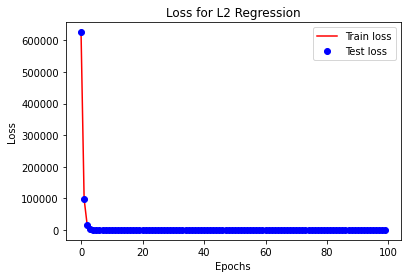

In [ ]:
num_epochs=100
plt.plot(range(num_epochs), train_loss_ridge,'r', label="Train loss")
plt.plot(range(num_epochs), test_loss_ridge, 'bo',label="Test loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Loss for L2 Regression')
plt.legend()
plt.show()

In [ ]:
#Evaluate L2
y_train_pred_l2 = np.dot(train_x, w_ridge)
train_mse_l2 = musicMSE(train_y,y_train_pred_l2)
y_test_pred_l2 = np.dot(test_x, w_ridge)
test_mse_l2 = musicMSE(test_y, y_test_pred_l2)
print("Train MSE L2:", train_mse_l2)
print("Test MSE L2:", test_mse_l2)

Train MSE L2: 91.25954878776945
Test MSE L2: 90.49457737280116


Pseudoinverse

In [ ]:
def compute_loss(X, y, weight, loss_type):
    if loss_type == 'L2':
        loss = np.mean((np.dot(X, weight) - y) ** 2)
    elif loss_type == 'count':
        loss = np.mean(np.abs(np.dot(X, weight) - y))
    elif loss_type == 'cross-entropy':
        exp_term = np.exp(np.dot(X, weight))
        loss = np.mean(np.log(1 + exp_term) - y * np.dot(X, weight))
    return loss

def pseudoinverse(train_x, train_y, test_x, test_y, alpha=0, loss_type='L2'):
    pseudoinv= np.dot(np.linalg.inv(train_x.T.dot(train_x) +
                                    alpha*np.eye(train_x.shape[1])), train_x.T)
    weight= np.dot(pseudoinv, train_y)
    train_y_predict= np.dot(train_x, weight)
    test_y_predict= np.dot(test_x, weight)

    train_loss= compute_loss(train_x, train_y, weight, loss_type=loss_type)
    test_loss= compute_loss(test_x, test_y,weight, loss_type=loss_type)
  
    print(f'Train loss: {train_loss:.4f}, Test loss: {test_loss:.4f}')
    
    return weight, train_loss, test_loss

In [ ]:
weight_inverse, train_loss_inverse, test_loss_inverse = pseudoinverse(train_x, train_y, test_x, test_y, alpha=0, loss_type='L2')

Train loss: 91.2564, Test loss: 90.4911


##4. Implement L1 weight decay

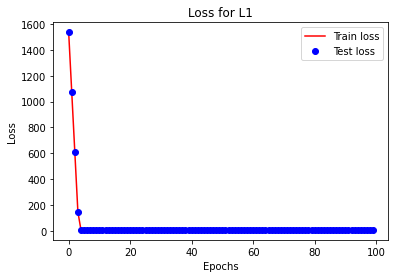

In [ ]:
w_lasso, train_loss_lasso, test_loss_lasso = mini_batch_gradient_descent(train_x, train_y, test_x, test_y, batch_size=32, num_epochs=100, learning_rate=0.001, weight_decay_factor=0.01, loss_type='L1', weight_decay_form='L1', momentum=False, momentum_factor=None)
num_epochs=100
plt.plot(range(num_epochs), train_loss_lasso,'r', label="Train loss")
plt.plot(range(num_epochs), test_loss_lasso, 'bo',label="Test loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Loss for L1')
plt.legend()
plt.show()

In [ ]:
#Evaluate L1
y_train_pred_l1 = np.dot(train_x, w_lasso)
train_mse_l1 = musicMSE(train_y,y_train_pred_l1)
y_test_pred_l1 = np.dot(test_x, w_lasso)
test_mse_l1 = musicMSE(test_y, y_test_pred_l1)
print("Train MSE L1:", train_mse_l1)
print("Test MSE L1:", test_mse_l1)

Train MSE L1: 97.95550511806826
Test MSE L1: 96.02618269479086


##5. Count Regression
\begin{align*}
y_{pred} &= e^{w^T X}\\
L(y, y_{pred}) &= e^{-y_{pred}} y_{pred}^y / y!\\
&= -\sum_{i=1}^{n}(y_i log(y_{pred,i}) - y_{pred,i})\\
\end{align*}

In [ ]:
w_count, train_loss_count, test_loss_count= w_ridge, train_loss_ridge, test_loss_ridge = mini_batch_gradient_descent(train_x, train_y, test_x, test_y, batch_size=16, num_epochs=100, learning_rate=0.000001, weight_decay_factor=0.000001, loss_type='count', weight_decay_form=None, momentum=False, momentum_factor=None)

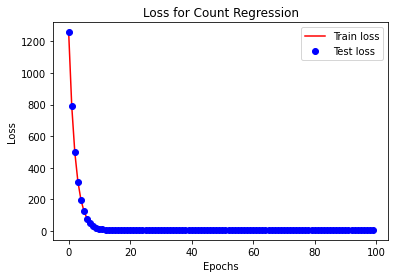

In [ ]:
num_epochs=100
plt.plot(range(num_epochs), train_loss_count,'r', label="Train loss")
plt.plot(range(num_epochs), test_loss_count, 'bo',label="Test loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Loss for Count Regression')
plt.legend()
plt.show()

From the plot, it looks like Epoch=20 is sufficient enough to minimize loss with low computational cost

In [ ]:
#Evaluate Count
y_train_pred_count = np.dot(train_x, w_count)
train_mse_count = musicMSE(train_y,y_train_pred_count)
y_test_pred_count = np.dot(test_x, w_count)
test_mse_count = musicMSE(test_y,y_test_pred_count)
print("Train MSE:", train_mse_count)
print("Test MSE:", test_mse_count)

Train MSE: 91.25954878776945
Test MSE: 90.49457737280116


##6. Model comparison


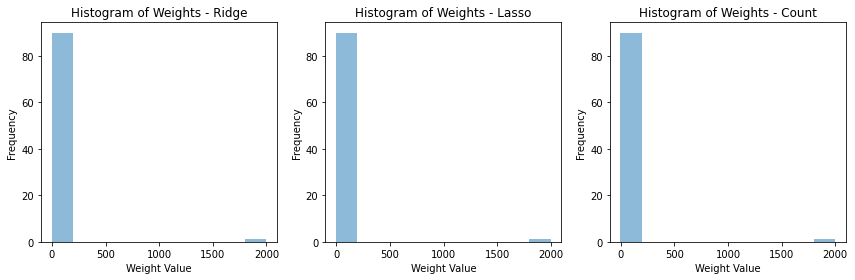

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].hist(w_ridge, alpha=0.5, label='Ridge')
axs[0].set_xlabel('Weight Value')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of Weights - Ridge')

axs[1].hist(w_lasso, alpha=0.5, label='Lasso')
axs[1].set_xlabel('Weight Value')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Weights - Lasso')

axs[2].hist(w_count, alpha=0.5, label='Count')
axs[2].set_xlabel('Weight Value')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Histogram of Weights - Count')

fig.tight_layout()
plt.show()


**Plot a histogram of the weights for the ridge, lasso, and count regression models. Discuss
how the weights differ**

For all 3 regression models, the weight is quite similar. It means that the penalty term applied is not really significant to the model.

Lasso regression gives significantly lower loss. It's important to note that Lasso is better at handling multicollinearity by performing feature selection and shrinking the cofficient towards zero and more effective in handling outliers. This might indicates our data has high sparsity or multicollinearity which resulting in Lasso performs better than Ridge. Count regression also uses L1 regularization term to compute loss $|y_{pred}-y|$. However, since the weights are similar, it means that all models are able to capture relationships between the attributes and target varible.

**Discuss and compare the behaviors of the models. Are there certain periods (ranges of
years) in which models perform better than others? Where are the largest errors across
models. Did regularization help for some models but not others?**


In [ ]:
#Evaluate model L2
periods = [(1920, 1940), (1940, 1960), (1960, 1980), (1980, 2000), (2000, 2020)]

for period in periods:
    train_mask = (train_y >= period[0]) & (train_y <= period[1])
    test_mask = (test_y >= period[0]) & (test_y <= period[1])
    train_x_period, train_y_period = train_x[train_mask], train_y[train_mask]
    test_x_period, test_y_period = test_x[test_mask], test_y[test_mask]

    # Train the model using mini-batch gradient descent
    weight, train_losses, test_losses = mini_batch_gradient_descent(train_x_period, train_y_period, test_x_period, test_y_period, batch_size=16, num_epochs=100, learning_rate=0.01, weight_decay_factor=0.000001, loss_type='L1', weight_decay_form=None, momentum=False, momentum_factor=None)
    
    # Evaluate the performance of the model on the test set for the period
    y_pred = np.dot(test_x_period, weight)
    mse = musicMSE(test_y_period, y_pred)
    print("Period:", period, "MSE:", mse)

Period: (1920, 1940) MSE: 166629.6559988117
Period: (1940, 1960) MSE: 93967.48540219196
Period: (1960, 1980) MSE: 23.714897564955834
Period: (1980, 2000) MSE: 27.5995692984008
Period: (2000, 2020) MSE: 9.966769105528742


From above, we could see that the model performs better starting from 1980 and works best in year 2000-2020. This is aligned with the histogram that we created above where the majority of the data coming from the later years.

In [ ]:
print("Train MSE L2:", train_mse_l2)
print("Test MSE L2:", test_mse_l2)

print("Train MSE L1:", train_mse_l1)
print("Test MSE L1:", test_mse_l1)

print("Train MSE Count:", train_mse_count)
print("Test MSE Count:", test_mse_count)

Train MSE L2: 91.25954878776945
Test MSE L2: 90.49457737280116
Train MSE L1: 97.95550511806826
Test MSE L1: 96.02618269479086
Train MSE Count: 91.25954878776945
Test MSE Count: 90.49457737280116


From MSE above, L2 Ridge Regression and Count Regression give larger error compared to Ridge.

# Problem 5 - Softmax Properties


###1. Show that the softmax function is invariant to constant offsets to its input

\begin{align*}
softmax(a+c1) &= \frac{exp(a+c1)}{\sum_{j=1}^{n}exp(a_j+c)} \\
&= \frac{exp(a)exp(c1)}{\sum_{j=1}^{n}exp(a_j)exp(c)}\\
&= \frac{exp(a)}{\sum_{j=1}^{n}exp(a_j)} \times \frac{exp(c1)}{\sum_{j=1}^{n}exp(c)}{}\\
&= softmax(a) \times \frac{exp(c1)}{n \times exp(c)}{}\\
&= softmax(a) \times \frac{exp(c1-c)}{n}
\end{align*}

Since $\frac{exp(c1-c)}{n}$ is a constant, it doesn't depend on $a$ and it's proven that softmax function is invariant to constant offset to its input.


###2.  Why is the observation that the softmax function is invariant to constant offsets to its input important when implementing it in a neural network?

It's important that softmax function is invariant to constant offset to its input because it allows the model to be more robust to changes in input data. Adding or substracting a constant value from input data doesn't change the output of sofmax function and making the network to generalize better to new data that can improve reliability and accuracy.

# Problem 6 - Implementing Softmax Classifier

Write a function to load the data and the labels, which are returned as NumPy arrays.

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

def load_iris_data(train_file, test_file):
    train_data = np.loadtxt(train_file)
    test_data = np.loadtxt(test_file)
    train_labels = train_data[:, 0].astype(int) -1
    train_features = train_data[:, 1:]
    test_labels = test_data[:, 0].astype(int) -1
    test_features = test_data[:, 1:]

    # Normalize the features to be between -1 and 1
    mean_train = np.mean(train_features, axis=0)
    std_train = np.std(train_features, axis=0)
    train_features = (train_features - mean_train) / std_train
    test_features = (test_features - mean_train) / std_train
    return train_features, train_labels, test_features, test_labels

iris_train = '/content/drive/MyDrive/Deep Learning/HW2/iris-train.txt'
iris_test = '/content/drive/MyDrive/Deep Learning/HW2/iris-test.txt'

X_train, y_train, X_test, y_test = load_iris_data(iris_train, iris_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 2)
(51, 2)
(90,)
(51,)


##1. Implementation & Evaluation

* Use softmax loss with L2 weight decay regularization  
*  Use stochastic gradient descent with mini batches and momentum to minimize softmax loss of single LNN (use environment's BLAS)
* Loop over epochs and mini batches (not individual vector/ matrices)
* 1000 epochs
* Normalize feature between -1 and 1
* Initial weight from Gaussian distribution

*Cross entropy loss*

$y_{i,j}$: true label for the $i$-th sample and $j$-th class

$p_{i,j}$: predicted probability for the $i$-th sample and $j$-th class. 
$$ L = - \frac{1}{N} \sum_{i=1}^N \sum_{j=1}^C y_{i,j} \log(p_{i,j}) $$


In [8]:
# Define softmax function
def softmax(z):
    e_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return e_z / np.sum(e_z, axis=1, keepdims=True)

# Define L2 regularization
def L2_regularization(W, beta):
    return 0.5 * beta * np.sum(W**2)

#Define forward 
def forward(X, w):
    return np.dot(X, w)

# Define cross-entropy loss
def compute_loss(y_pred, y_true):
    num_samples = y_pred.shape[0]
    y_pred = np.clip(y_pred, 1e-8, 1 - 1e-8)
    correct_logprobs = -np.log(y_pred[range(num_samples), y_true])
    data_loss = np.sum(correct_logprobs) / num_samples
    return data_loss

# Define gradient function
def gradient(X, y, y_pred, W, b, beta):
    num_samples = X.shape[0]
    dL_dy = y_pred
    dL_dy[range(num_samples), y] -= 1
    dL_dy /= num_samples
    grad_weight = X.T.dot(dL_dy) + beta * W
    grad_bias = np.sum(dL_dy, axis=0, keepdims=True)
    return grad_weight, grad_bias

def softmax_classifier(X_train, y_train, X_test, y_test, num_epochs, 
                       batch_size, learning_rate = 0.01, momentum = 0.9, 
                       weight_decay = 0.01):
  train_loss_list = []
  test_loss_list = []
  train_accuracy_list = []
  test_accuracy_list = []

  # Initialize weights
  num_features = X_train.shape[1]
  num_classes = len(np.unique(y_train))
  print(num_classes)
  W = np.random.normal(loc=0.0, scale=0.1, size=(num_features, num_classes))
  b = np.zeros(num_classes)

  # Initialize momentum
  V_dW = np.zeros_like(W)
  V_db = np.zeros_like(b)

  # Train the model
  for epoch in range(num_epochs):
      # Shuffle training data
      indices = np.random.permutation(X_train.shape[0])
      X_train = X_train[indices]
      y_train = y_train[indices]

      # Mini-batch training
      for i in range(0, X_train.shape[0], batch_size):
          X_batch = X_train[i:i+batch_size]
          y_batch = y_train[i:i+batch_size]

          # Forward pass
          z = forward(X_batch,W) + b
          y_pred = softmax(z)

          # Compute loss and regularization
          loss = compute_loss(y_pred, y_batch)
          reg_loss = loss + L2_regularization(W, weight_decay)

          # Compute gradients
          dW, db = gradient(X_batch, y_batch, y_pred, W, b, weight_decay)

          # Update weights and bias using momentum
          V_dW = momentum * V_dW - learning_rate * dW
          V_db = momentum * V_db - learning_rate * db
          W += V_dW
          b = b.reshape(-1, 1) + V_db.reshape(-1, 1)
          b = b.reshape(1, -1)
          
      #Compute and store training loss
      z_train = forward(X_train, W) + b
      y_pred_train = softmax(z_train)
      train_loss = compute_loss(y_pred_train, y_train)
      train_loss_list.append(train_loss)

      # Compute and store testing loss
      z_test = forward(X_test, W) + b
      y_pred_test = softmax(z_test)
      test_loss = compute_loss(y_pred_test, y_test)
      test_loss_list.append(test_loss)

      # Compute and store training accuracy
      y_pred_train_class = np.argmax(y_pred_train, axis=1)
      train_accuracy = np.mean(y_pred_train_class == y_train)
      train_accuracy_list.append(train_accuracy)

      # Compute and store testing accuracy
      y_pred_test_class = np.argmax(y_pred_test, axis=1)
      test_accuracy = np.mean(y_pred_test_class == y_test)
      test_accuracy_list.append(test_accuracy)
    
  y_pred_test = np.argmax(y_pred_test, axis=1)
  return train_loss_list, test_loss_list, train_accuracy_list, test_accuracy_list, y_pred_test, W, b

In [17]:
train_loss_list, test_loss_list, train_accuracy_list, test_accuracy_list, y_pred_test, W, b= softmax_classifier(X_train, y_train, X_test, y_test,  num_epochs = 1000, batch_size = 128,learning_rate = 0.01,momentum = 0.9, weight_decay = 0.1)

3


Generate plot:
1. Cross-entropy loss during training as a function of number of epochs
2. Mean per class accuracy as a function of training epoch

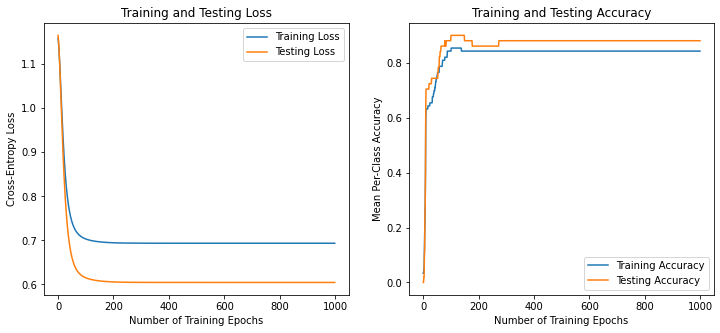

In [18]:
import matplotlib.pyplot as plt

# Plot training and testing loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_list, label="Training Loss")
plt.plot(test_loss_list, label="Testing Loss")
plt.xlabel("Number of Training Epochs")
plt.ylabel("Cross-Entropy Loss")
plt.title("Training and Testing Loss")
plt.legend()

# Plot training and testing accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_list, label="Training Accuracy")
plt.plot(test_accuracy_list, label="Testing Accuracy")
plt.xlabel("Number of Training Epochs")
plt.ylabel("Mean Per-Class Accuracy")
plt.title("Training and Testing Accuracy")
plt.legend()

plt.show()

In [19]:
print('Best test accuracy', np.max(test_accuracy_list))
print('Best train accuracy', np.max(train_accuracy_list))
print('Final test accuracy', test_accuracy_list[-1])
print('Final train accuracy', train_accuracy_list[-1])

Best test accuracy 0.9019607843137255
Best train accuracy 0.8555555555555555
Final test accuracy 0.8823529411764706
Final train accuracy 0.8444444444444444


**What is the best test accuracy your model achieved?**
Best test accuracy that the model has achieved is 90%

**What hyperparameters did you use?**
* learning_rate = 0.01
* num_epochs = 1000
* batch_size = 128 --> increasing number of batch size make the loss curve smoother as it reduce the noise in gradient estimates
* momentum = 0.9
* weight_decay = 0.001

**Would early stopping have helped improve accuracy on the test data?** Early stopping could potentially help if the model is overfitting the training data and early stopping will allow the model to stop trainining once performance on test data stops improving. However, from the plot we can see that the model is not overfit the training data, therefore early stopping will not improve accuracy.


##2. Displaying Decision Boundaries
* Decision boundaries
* Scatter plot of training data

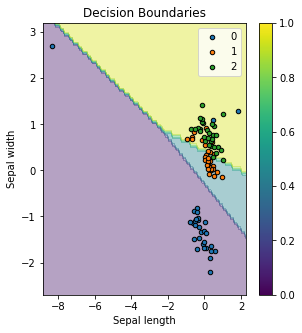

In [20]:
import matplotlib.pyplot as plt
# Display decision boundaries
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = np.argmax(softmax(np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, alpha=0.4)
for i, iris_class in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], s=20,
                edgecolor='k', label=iris_class)
plt.title("Decision Boundaries")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.colorbar()
plt.legend(loc='best')
plt.show()

##Problem 7- Classifying Images

In [21]:
import numpy as np
import pandas as pd

In [22]:
# Load dataset
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test)= cifar10.load_data()

# Convert pixel values to float and scale to [0,1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
    
# Flatten the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
y_train = y_train.flatten()
y_test = y_test.flatten()

170498071/170498071 [==============================] - 12s 0us/step


In [23]:
train_loss_list_cifar, test_loss_list_cifar, train_accuracy_list_cifar, test_accuracy_list_cifar, y_pred_test,W,b=  softmax_classifier(X_train, y_train, X_test, y_test, num_epochs=100, batch_size=168, learning_rate=0.001, momentum=0.9, weight_decay=0.01)

10


a. Plot the training loss as a function of training epochs

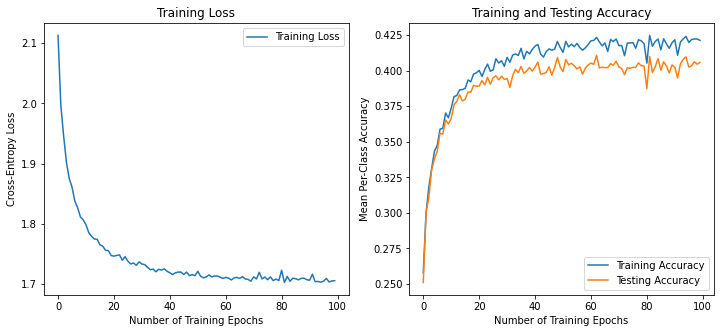

In [24]:
from matplotlib import pyplot as plt
# Plot training and testing loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_list_cifar, label="Training Loss")
plt.xlabel("Number of Training Epochs")
plt.ylabel("Cross-Entropy Loss")
plt.title("Training Loss")
plt.legend()

# Plot training and testing accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_list_cifar, label="Training Accuracy")
plt.plot(test_accuracy_list_cifar, label="Testing Accuracy")
plt.xlabel("Number of Training Epochs")
plt.ylabel("Mean Per-Class Accuracy")
plt.title("Training and Testing Accuracy")
plt.legend()

plt.show()

b. Output the final test accuracy and a
normalized 10 ×10 confusion matrix computed on the test partition. Make sure to label
the columns and rows of the confusion matrix.

In [25]:
print('Final test accuracy', test_accuracy_list_cifar[-1])
print('Final train accuracy', train_accuracy_list_cifar[-1])

Final test accuracy 0.4059
Final train accuracy 0.42136


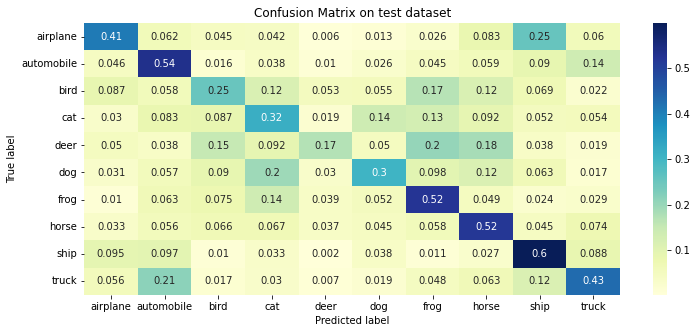

In [26]:
import seaborn as seaborn
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_test, normalize = 'true')
categories= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 
             'horse', 'ship', 'truck']
df_cm = pd.DataFrame(cf_matrix ,index = categories,
                  columns = categories)
plt.figure(figsize = (12,5))
ax = plt.axes()
seaborn.heatmap(df_cm, ax = ax, annot=True, cmap="YlGnBu")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_title('Confusion Matrix on test dataset')
plt.show()

Best hyperparameter:
* num_epochs=100 
* batch_size=168 -> large batch size for faster convergence due to large dataset
* learning_rate=0.001
* momentum=0.9 
* weight_decay=0.01